In [1]:
import numpy as np
import pandas as pd
import researchpy as rp
import seaborn as sns
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn import preprocessing
import math

In [3]:
#fixing random seed for reproducibility
np.random.seed(7)

In [4]:
ntc = pd.read_csv('ntcprice.csv')

In [5]:
print(ntc.shape)

(2200, 11)


In [6]:
#sorting values according to date in pandas
ntc=ntc.sort_values('Date',axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last')

In [7]:
del ntc['SN']

In [8]:
ntc.head()

Date  No. of Transaction  Max Price  Min Price  Closing Price  \
2199  2010-04-15                  13      455.0      422.0          455.0   
2198  2010-04-15                  13      455.0      422.0          455.0   
2197  2010-04-15                  13      455.0      422.0          455.0   
2196  2010-04-19                   3      445.0      441.0          441.0   
2195  2010-04-20                   7      445.0      440.0          444.0   

      Traded Shares  Total Amount  Prev. Closing  Difference(Rs)  % Change  
2199           3300       1464600          414.0            41.0      9.90  
2198           3300       1464600          414.0            41.0      9.90  
2197           3300       1464600          414.0            41.0      9.90  
2196            400        177500          442.0            -1.0     -0.23  
2195           3870       1708480          441.0             3.0      0.68

In [9]:
ntc['Closing Price'].describe()

count    2200.000000
mean      615.004782
std       114.911962
min         0.000000
25%       534.000000
50%       647.000000
75%       689.000000
max       940.000000
Name: Closing Price, dtype: float64

In [10]:
import numpy as np

# Calculate the average where 'Closing Price' is 0
avg_price = (ntc['Max Price'] + ntc['Min Price']) / 2

# Replace the zeros in 'Closing Price' column with the calculated average
ntc.loc[ntc['Closing Price'] == 0, 'Closing Price'] = avg_price[ntc['Closing Price'] == 0]

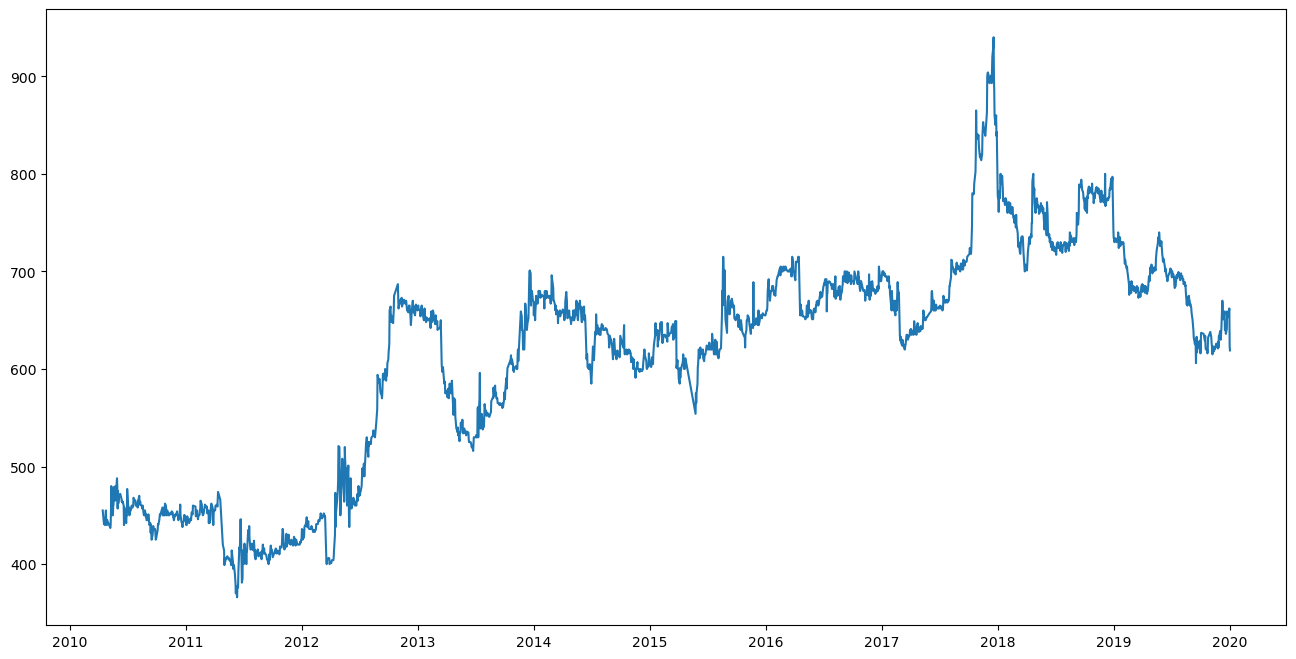

In [11]:
#setting index as date
ntc['Date'] = pd.to_datetime(ntc.Date,format='%Y-%m-%d')
ntc.index=ntc['Date']
plt.figure(figsize=(16,8))
plt.plot(ntc['Closing Price'],label='Close Price History')

<Axes: xlabel='Closing Price'>

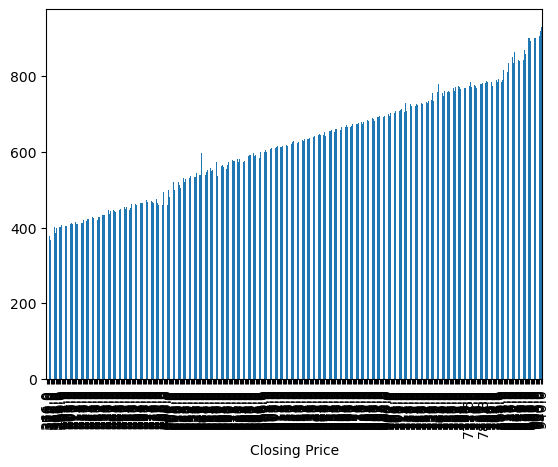

In [12]:
ntc.groupby('Closing Price')['Prev. Closing'].mean().plot.bar()

In [13]:
#selecting only the columns that we are going to predict
data_to_use = ntc.filter(['Closing Price'])
#converting to numpy arrays
dataset = data_to_use.values

In [14]:
#data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dataset_scaled = scaler.fit_transform(dataset)

In [15]:
#walk forward train test
X = np.array(dataset)
train, test = X[0:-200],X[-200:]
print('train=%d, test=%d' % (len(train), len(test)))

train=2000, test=200


RMSE: 6.796


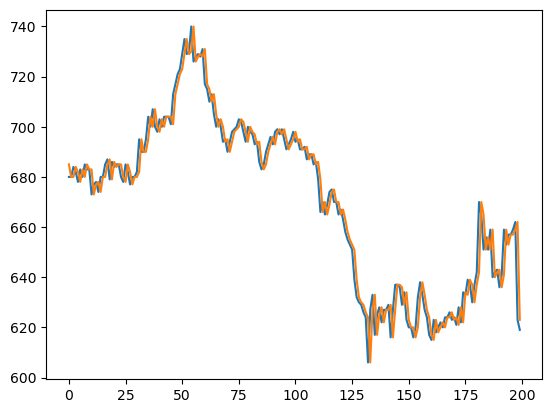

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
  #walk forward validation
history = [t for t in train]
predictions = list()
for j in range(len(test)):
    #making prediction
  predictions.append(history[-1])
  #observation
  history.append(test[j])
#report performance
rmse = sqrt(mean_squared_error(test,predictions))
print('RMSE: %.3f' %rmse)
plt.plot(test)
plt.plot(predictions)
#plt.plot(persistence_values,scores)
plt.show()

In [17]:
#data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train)

In [18]:
X_train = []
y_train = []
for i in range(60,len(train_scaled)):
  X_train.append(train_scaled[i-60:i,0])
  y_train.append(train_scaled[i,0])
  if i <= 60:
    print(X_train)
    print(y_train)
    print()

[array([0.15505226, 0.15505226, 0.15505226, 0.13066202, 0.1358885 ,
       0.13414634, 0.12891986, 0.15505226, 0.13763066, 0.13763066,
       0.12891986, 0.13763066, 0.12369338, 0.12891986, 0.1533101 ,
       0.19860627, 0.18815331, 0.14634146, 0.14634146, 0.16202091,
       0.16550523, 0.19686411, 0.19686411, 0.17247387, 0.19860627,
       0.18118467, 0.21254355, 0.19686411, 0.15853659, 0.18989547,
       0.16724739, 0.18292683, 0.18118467, 0.18118467, 0.18466899,
       0.18292683, 0.17595819, 0.17073171, 0.17247387, 0.16898955,
       0.17073171, 0.16376307, 0.12891986, 0.16027875, 0.15505226,
       0.14808362, 0.13240418, 0.14634146, 0.14634146, 0.19337979,
       0.16376307, 0.15505226, 0.15156794, 0.16027875, 0.14634146,
       0.15679443, 0.15679443, 0.16027875, 0.16376307, 0.16027875])]
[0.16376306620209058]



In [19]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
#reshape the data in 3d
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
X_train.shape

(1940, 60, 1)

In [22]:
y_train.shape

(1940,)

In [25]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for fl

   -- ------------------------------------ 25.7/377.0 MB 182.6 kB/s eta 0:32:05
   -- ------------------------------------ 25.7/377.0 MB 182.6 kB/s eta 0:32:05
   -- ------------------------------------ 25.7/377.0 MB 183.1 kB/s eta 0:31:59
   -- ------------------------------------ 25.7/377.0 MB 183.1 kB/s eta 0:31:59
   -- ------------------------------------ 25.7/377.0 MB 183.1 kB/s eta 0:31:59
   -- ------------------------------------ 25.7/377.0 MB 183.6 kB/s eta 0:31:54
   -- ------------------------------------ 25.7/377.0 MB 183.6 kB/s eta 0:31:54
   -- ------------------------------------ 25.7/377.0 MB 183.2 kB/s eta 0:31:57
   -- ------------------------------------ 25.7/377.0 MB 183.2 kB/s eta 0:31:57
   -- ------------------------------------ 25.7/377.0 MB 183.2 kB/s eta 0:31:57
   -- ------------------------------------ 25.7/377.0 MB 183.7 kB/s eta 0:31:52
   -- ------------------------------------ 25.7/377.0 MB 183.7 kB/s eta 0:31:52
   -- ----------------------------------

   ------- -------------------------------- 67.0/377.0 MB 72.2 kB/s eta 1:11:35
   ------- -------------------------------- 67.0/377.0 MB 72.2 kB/s eta 1:11:35
   ------- -------------------------------- 67.0/377.0 MB 72.2 kB/s eta 1:11:35
   ------- -------------------------------- 67.0/377.0 MB 72.2 kB/s eta 1:11:35
   ------- -------------------------------- 67.0/377.0 MB 72.2 kB/s eta 1:11:35
   ------- -------------------------------- 67.0/377.0 MB 72.2 kB/s eta 1:11:35
   ------- -------------------------------- 67.0/377.0 MB 72.2 kB/s eta 1:11:35
   ------- -------------------------------- 67.0/377.0 MB 72.2 kB/s eta 1:11:35
   ------- -------------------------------- 67.0/377.0 MB 72.2 kB/s eta 1:11:35
   ------- -------------------------------- 67.0/377.0 MB 72.2 kB/s eta 1:11:35
   ------- -------------------------------- 67.0/377.0 MB 72.2 kB/s eta 1:11:35
   ------- -------------------------------- 67.0/377.0 MB 72.2 kB/s eta 1:11:35
   ------- -----------------------------

   ------- ------------------------------- 72.3/377.0 MB 111.5 kB/s eta 0:45:34
   ------- ------------------------------- 72.3/377.0 MB 111.8 kB/s eta 0:45:26
   ------- ------------------------------- 72.3/377.0 MB 111.8 kB/s eta 0:45:26
   ------- ------------------------------- 72.3/377.0 MB 111.8 kB/s eta 0:45:26
   ------- ------------------------------- 72.3/377.0 MB 111.8 kB/s eta 0:45:26
   ------- ------------------------------- 72.3/377.0 MB 112.3 kB/s eta 0:45:14
   ------- ------------------------------- 72.3/377.0 MB 112.3 kB/s eta 0:45:14
   ------- ------------------------------- 72.3/377.0 MB 112.3 kB/s eta 0:45:14
   ------- ------------------------------- 72.3/377.0 MB 112.3 kB/s eta 0:45:14
   ------- ------------------------------- 72.3/377.0 MB 112.3 kB/s eta 0:45:14
   ------- ------------------------------- 72.3/377.0 MB 112.3 kB/s eta 0:45:14
   ------- ------------------------------- 72.3/377.0 MB 112.1 kB/s eta 0:45:18
   ------- -----------------------------

   --------------------- ---------------- 213.7/377.0 MB 382.4 kB/s eta 0:07:07
   --------------------- ---------------- 213.7/377.0 MB 383.1 kB/s eta 0:07:07
   --------------------- ---------------- 213.8/377.0 MB 382.4 kB/s eta 0:07:07
   --------------------- ---------------- 213.8/377.0 MB 382.6 kB/s eta 0:07:07
   --------------------- ---------------- 213.8/377.0 MB 383.3 kB/s eta 0:07:06
   --------------------- ---------------- 213.8/377.0 MB 383.8 kB/s eta 0:07:06
   --------------------- ---------------- 213.8/377.0 MB 383.8 kB/s eta 0:07:06
   --------------------- ---------------- 213.8/377.0 MB 384.2 kB/s eta 0:07:05
   --------------------- ---------------- 213.9/377.0 MB 384.7 kB/s eta 0:07:05
   --------------------- ---------------- 213.9/377.0 MB 384.7 kB/s eta 0:07:04
   --------------------- ---------------- 213.9/377.0 MB 384.9 kB/s eta 0:07:04
   --------------------- ---------------- 213.9/377.0 MB 385.3 kB/s eta 0:07:04
   --------------------- ---------------

In [26]:
import tensorflow as tf
import io
import math

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [28]:
from tensorflow.keras import regularizers

In [29]:
#build the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dense(25,activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(1))

In [30]:
#compile the model
model.compile(optimizer='adam',metrics=['accuracy'],loss = 'mean_squared_error')

In [31]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_loss',patience=10, min_delta=1e-3,mode='auto')

In [35]:
history= model.fit(X_train, y_train, batch_size=200, epochs=1000, verbose=1, callbacks=[es],validation_split=0.20,shuffle=False)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - accuracy: 0.0016 - loss: 0.0061 - val_accuracy: 0.0026 - val_loss: 0.0185
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - accuracy: 0.0016 - loss: 0.0061 - val_accuracy: 0.0026 - val_loss: 0.0132
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.0016 - loss: 0.0046 - val_accuracy: 0.0026 - val_loss: 0.0088
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - accuracy: 0.0016 - loss: 0.0057 - val_accuracy: 0.0026 - val_loss: 0.0187
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.0016 - loss: 0.0066 - val_accuracy: 0.0026 - val_loss: 0.0139
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.0016 - loss: 0.0047 - val_accuracy: 0.0026 - val_loss: 0.0084
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 0.0016 - loss: 0.0064 - val_accuracy: 0.0026 - val_loss: 0.0155
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.0016 - loss: 0.0063 - val_accuracy: 0.

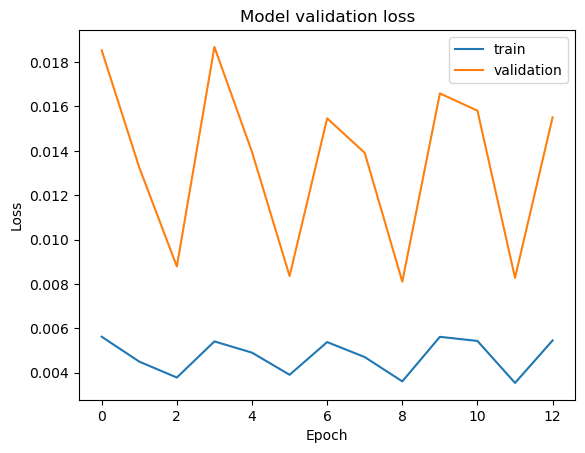

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','validation'], loc='upper right')
plt.show()

In [37]:
In = dataset_scaled[len(dataset)-len(test)-60:,:]

In [38]:
#dividing into x_test and y_test
X_test = []
y_test = test
for i in range(60,len(In)):
  X_test.append(In[i-60:i,0])

In [39]:
y_test.shape

(200, 1)

In [40]:
#Convert the data to numpy array
X_test = np.array(X_test)

In [41]:
#reshape the data
X_test =np.reshape(X_test,(X_test.shape[0] ,X_test.shape[1],1))

In [42]:
X_test.shape

(200, 60, 1)

In [43]:
#Getting the models predicted values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step


In [44]:
rmse = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

29.811230731059094

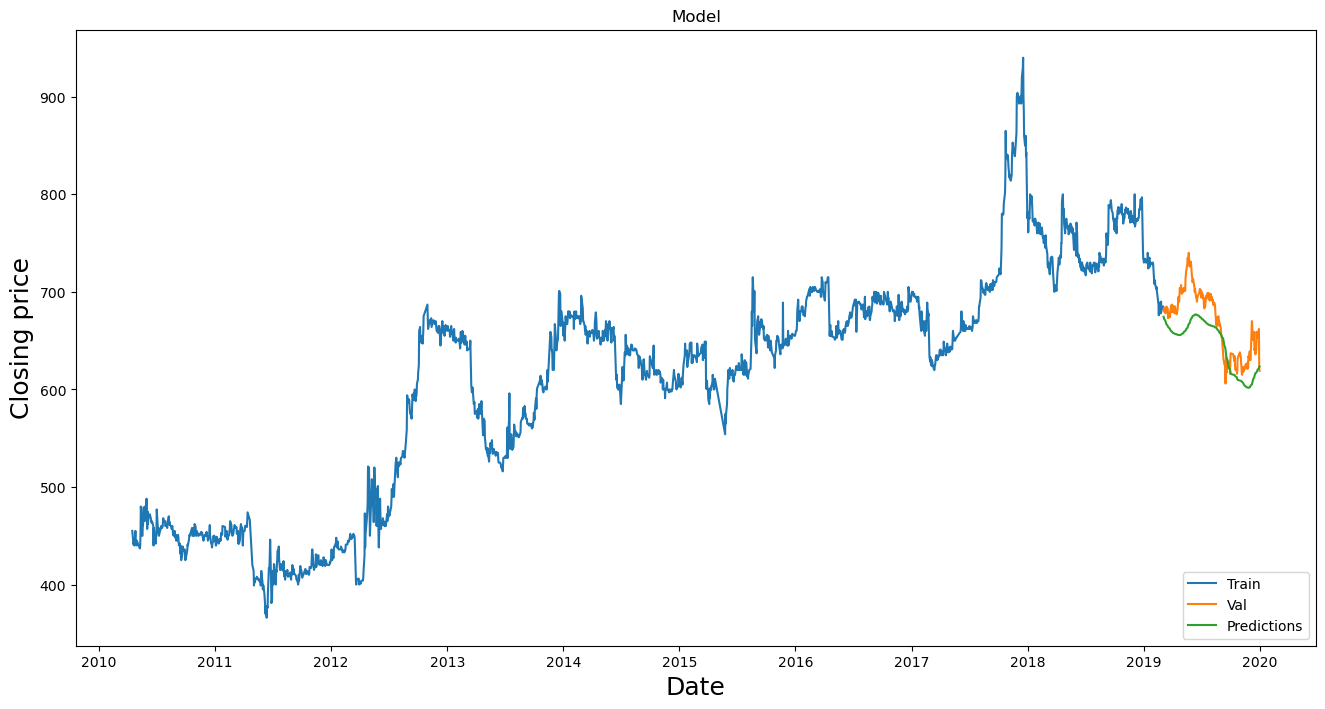

In [45]:
#visualize the data
train, test = data_to_use[0:-200],data_to_use[-200:]
valid = data_to_use[len(train):]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price', fontsize=18)
plt.plot(train['Closing Price'])
plt.plot(valid[['Closing Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [46]:
valid.tail()

Closing Price  Predictions
Date                                  
2019-12-26          657.0   620.310303
2019-12-29          659.0   621.195007
2019-12-30          662.0   622.096802
2019-12-31          623.0   623.039612
2020-01-01          619.0   623.478760

In [47]:
#Get the models predicted price values 
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [48]:
#get the quote
ntc = pd.read_csv('ntcprice.csv')
#creating a new dataframe
new_ntc = ntc.filter(['Closing Price'])
#get the last 120 days data and converting dataframe to an array
last_60_days = new_ntc[-60:].values
#scaling the data to be values between 0 and 1
last_60_days_scaled = scaler.fit_transform(last_60_days)
#creating an empty list
X_test = []
#append the values
X_test.append(last_60_days_scaled)
#converting it into numpy array
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[449.5914]]
